Les SVM à noyaux sont implémentées dans "scikit-learn" dans les classes "sklearn.svm.SVC" pour la classification et "sklearn.svm.SVR" pour la régression. Dans ces deux classes, on peut spécifier un noyau grâce au paramètre «kernel». Ce noyau peut être (linéaire, polynomial, RBF), mais on peut aussi définir vos propres noyaux !

## Exercice 1 (Exemples simulés)

## Exemple 1

### 1. 

In [1]:
def Echantillon(n):
    
    x = np.random.uniform(-3,3,n)
    b = np.random.uniform(-3,3,n)
    Y = np.zeros(n)
    
    Y[b > 0] = [1 for i in range(np.sum(b > 0))]
    Y[b < 0] = [-1 for i in range(np.sum(b < 0))]
    
    return pd.DataFrame({'X1': x,'X2': x+b,'Y': Y.astype(int)})

In [2]:
from random import *
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

n = 200

df = Echantillon(n)
df.head(10)

,X1,X2,Y
0,1.242171,-0.769459,-1
1,2.039551,-0.692068,-1
2,1.231944,-1.590825,-1
3,2.817984,5.012654,1
4,1.556916,1.422135,-1
5,-0.726752,-1.859946,-1
6,2.662287,4.377926,1
7,-2.559159,-4.450248,-1
8,-1.271513,0.941429,1
9,-0.696894,-3.568037,-1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(8,8))

#plt.plot([-3, 3], [-3, 3], sns.xkcd_rgb["denim blue"], lw=3);
sns.scatterplot(x="X1", y="X2", style = "Y", hue="Y", data=df, s =100)
plt.show()

<Figure size 800x800 with 1 Axes>

In [4]:
sum(df["Y"]==0)

0

In [5]:
print(df.dtypes)
df["Y"] = df["Y"].astype(str)
print("\nAprés convertion en facteur:\n")
print(df.dtypes)

X1    float64
X2    float64
Y       int64
dtype: object

Aprés convertion en facteur:

X1    float64
X2    float64
Y      object
dtype: object


### 2.

In [6]:
from sklearn.svm import SVC

svmlinear = SVC(C=100,kernel='linear')
svmlinear.fit(df[["X1","X2"]], df["Y"])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### 3.

### 4.

In [7]:
xi = svmlinear.support_vectors_ # coordonnées des vecteur supports
print("nombre de vecteurs supports: ", xi.shape[0],"\n")
print(xi)

nombre de vecteurs supports:  5 

[[-1.62086689 -1.68315505]
 [-2.53567424 -2.66839153]
 [-2.11562916 -2.05100006]
 [-2.25543609 -2.13174498]
 [ 1.97541487  2.2033435 ]]


In [8]:
print(svmlinear.support_) # indice des vecteur supports

[148 162 109 175 178]


In [9]:
svmlinear.coef_

array([[-8.2181299 ,  8.02029816]])

In [10]:
#coefficients beta1 et beta2
print(svmlinear.coef_)

[[-8.2181299   8.02029816]]


In [11]:
beta0 = svmlinear.intercept_[0] # l'intercept beta0
print(beta0)

-0.43754786642454846


### 5.


### 6. 

In [12]:
from sklearn.metrics import confusion_matrix

prediction=svmlinear.predict(df[["X1","X2"]])

print("matrice de confusion")
M1 = confusion_matrix(df["Y"], prediction)
M1

matrice de confusion


array([[ 92,   0],
       [  0, 108]])

In [13]:
print("Précision de classification d'entraînement:", M1.trace()/M1.sum())

Précision de classification d'entraînement: 1.0


### 7.

In [14]:
df_test = Echantillon(100)
df_test["Y"] = df_test["Y"].astype(str)

prediction_test = svmlinear.predict(df_test[["X1","X2"]])

print("matrice de confusion")
M_test = confusion_matrix(df_test["Y"], prediction_test)
M_test

matrice de confusion


array([[50,  0],
       [ 1, 49]])

In [15]:
print("Précision de classification de test:", M_test.trace()/M_test.sum())

Précision de classification de test: 0.99


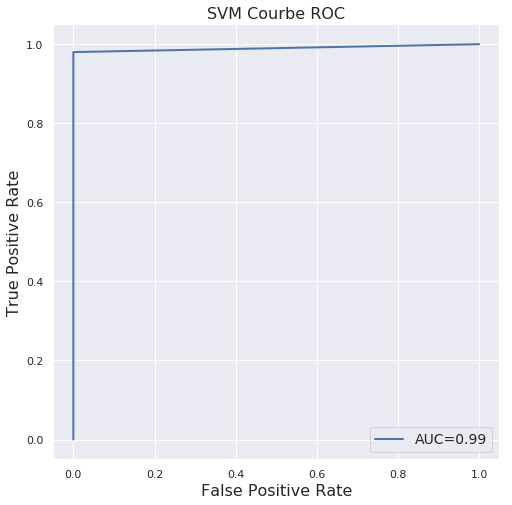

In [16]:
# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(df_test["Y"].astype(int), prediction_test.astype(int))

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 8))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM Courbe ROC', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

### 8.

In [17]:
svm_defaut = SVC()
svm_defaut # le noyau par default sur sklearn est 'rbf'
# RBF :  Radial Basis Function, désigne souvent le noyau gaussien.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
svm_defaut.fit(df[["X1","X2"]], df["Y"])
prediction=svm_defaut.predict(df[["X1","X2"]])

print("matrice de confusion")
M1 = confusion_matrix(df["Y"], prediction)
M1

matrice de confusion


/home/malick/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[ 92,   0],
       [  3, 105]])

## Exemple 2

### 1.

In [19]:
from random import *
import numpy as np
import pandas as pd

n = 100
p = 2

X = np.random.randn(n*p)
X = X.reshape(n,p)

### 2.

In [20]:
y = np.ones(n)
df = pd.DataFrame({'X1': X[:,0],'X2': X[:,1],'Y': y})

In [21]:
Norme = df[['X1','X2']].apply(lambda x: sum(x**2), axis=1)
df[Norme > p] = -1
df["Y"] = df["Y"].astype(str)
df.dtypes

X1    float64
X2    float64
Y      object
dtype: object

### 3.

##### a.

In [22]:
from sklearn.svm import SVC

svmPoly = SVC(C=1,degree=3, gamma='auto',coef0=0.0, kernel='poly')
svmPoly.fit(df[["X1","X2"]], df["Y"])

svmRBF = SVC(C=1, gamma='auto', kernel='rbf')
svmRBF.fit(df[["X1","X2"]], df["Y"])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##### b.

In [23]:
from sklearn.model_selection import GridSearchCV

#on crée un nouveau modèle SVM à noyau Gaussien
svmRBF = SVC(kernel='rbf')

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid = {"C": np.arange(0.1, 20), "gamma" : np.arange(0,1,0.05)}

#on utilise gridsearch pour tester toutes les valeurs
svmRBF_gscv = GridSearchCV(svmRBF, param_grid, cv=5, n_jobs=-1, verbose=10)

#ajustement du modèle aux données
svmRBF_gscv.fit(df[["X1","X2"]], df["Y"])

print("Précision Train: ",svmRBF_gscv.score(df[["X1","X2"]], df["Y"]))
print("Précision Test: ",svmRBF_gscv.score(df_test[["X1","X2"]], df_test["Y"]))
print("\n")
print(svmRBF_gscv.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1789s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1105s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1812s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 255 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 567 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 747 tasks      | elapsed: 

Précision Train:  0.98
Précision Test:  0.0


{'C': 0.1, 'gamma': 0.4}


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   13.7s finished
/home/malick/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
#les paramétres du modéle le plus performant:
svmRBF_gscv.best_params_

{'C': 0.1, 'gamma': 0.4}

In [25]:
#le score moyen avec les paramétres du modéle le plus performant
svmRBF_gscv.best_score_

1.0

In [26]:
X = np.random.randn(n*p)
X = X.reshape(n,p)

y = np.ones(n)
df_test = pd.DataFrame({'X1': X[:,0],'X2': X[:,1],'Y': y})

Norme = df_test[['X1','X2']].apply(lambda x: sum(x**2), axis=1)
df_test[Norme > p] = -1
df_test["Y"] = df["Y"]

In [27]:
from sklearn.metrics import confusion_matrix

prediction_test = svmRBF_gscv.predict(df_test[["X1","X2"]])

print("matrice de confusion")
M_smvRBF = confusion_matrix(df_test["Y"], prediction_test)
M_smvRBF

matrice de confusion


array([[ 7, 21],
       [31, 41]])

In [28]:
print("Précision de classification d'entraînement:", M_smvRBF.trace()/M_smvRBF.sum())

Précision de classification d'entraînement: 0.48


In [29]:
#on crée un nouveau modèle SVM à noyau Polynomiale
svmPOLY = SVC(kernel='poly')

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid = {"C": np.arange(0.1, 20), "gamma" : np.arange(0,1,0.05), "degree": [2,3], "coef0": np.arange(0,1,0.5)}

#on utilise gridsearch pour tester toutes les valeurs
svmPOLY_gscv = GridSearchCV(svmPOLY, param_grid, cv=5, n_jobs=-1, verbose=10)

#ajustement du modèle aux données
svmPOLY_gscv.fit(df[["X1","X2"]], df["Y"])

print("Précision Train: ",svmPOLY_gscv.score(df[["X1","X2"]], df["Y"]))
print("Précision Test: ",svmPOLY_gscv.score(df_test[["X1","X2"]], df_test["Y"]))
print("\n")
print(svmPOLY_gscv.best_params_)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0374s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 978 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 1298 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 1468

Précision Train:  0.99
Précision Test:  0.48


{'C': 0.1, 'coef0': 0.0, 'degree': 3, 'gamma': 0.45}


[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:   43.5s finished
/home/malick/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
prediction_test = svmPOLY_gscv.predict(df_test[["X1","X2"]])

print("matrice de confusion")
M_smvPOLY = confusion_matrix(df_test["Y"], prediction_test)
M_smvPOLY

matrice de confusion


array([[ 7, 21],
       [31, 41]])

In [31]:
print("Précision de classification d'entraînement:", M_smvPOLY.trace()/M_smvPOLY.sum())

Précision de classification d'entraînement: 0.48


# Exercice 2

### 1. 

In [ ]:
path_Home = "/home/malick/Bureau/Data/Statistique_en_grande_dimension/Donnees_knn"
path = "/users/mmath/wade/Bureau/Data/Statistique_en_grande_dimension/Donnees_knn"

df_train = pd.read_csv(path_Home + "/synth_train.txt",  sep='\t')
df_test = pd.read_csv(path_Home + "/synth_test.txt",  sep='\t')

In [ ]:
df_train.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.lmplot(data=df_train, x='x1', y='x2', hue='y', markers=['o', 'o'], fit_reg=False)

### 2. 

In [ ]:
k = 30

Xtrain,Ytrain = df_train[["x1","x2"]], df_train["y"]
Xtest,Ytest = df_test[["x1","x2"]], df_test["y"]

##### 2.5 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=k, weights = p)
knn.fit(Xtrain, Ytrain)
k30 = knn.predict(Xtest)

#pd.DataFrame({"knn[K=30]": k30})

##### 2.6

In [ ]:
print("matrice de confusion avec k=30")
M30 = confusion_matrix(Ytest, k30)
M30

##### 2.7

In [ ]:
print("Précision de classification avec k=30:", M30.trace()/M30.sum())


##### 2.9

###### a. validation croisée de type Leave-One-Out

In [ ]:
#on regroupe les données pour la validation croisée
df = pd.concat([df_train,df_test], ignore_index=True)
X, Y = df[["x1","x2"]], df["y"]

loo = LeaveOneOut()
knn_cv = KNeighborsClassifier(n_neighbors=k, weights = p)
cv_scores = cross_val_score(knn_cv, X, Y, cv=loo)

print(cv_scores)
print("moyenne des scores:", np.mean(cv_scores))

##### b. programmant d'une validation croisée  avec 5-fold

In [ ]:
cv = 5
max_Voisins = 50

Voisins = np.arange(1,max_Voisins)

I=np.arange(df.shape[0])
taillefold = int(df.shape[0]/cv)

Cross_V = {}


for k in Voisins:  
    Precision = []

    for i in range(cv):
        
        Iv = I[i*taillefold: (i+1)*taillefold]
        
        Xtr=X.drop(Iv, axis=0)
        Ytr=Y.drop(Iv, axis=0)

        Xte=X.iloc[Iv]
        Yte=Y.iloc[Iv]
    
        knn = KNeighborsClassifier(n_neighbors=k, weights = p)
        knn.fit(Xtr, Ytr)
        M = confusion_matrix(Yte, knn.predict(Xte))
        Precision.append(M.trace()/M.sum())

    Cross_V [k] = round((np.array(Precision)).mean(), 4) 

In [ ]:
print("k:" ,max(zip(Cross_V.values(), Cross_V.keys()))[1])
print("précision:" ,max(zip(Cross_V.values(), Cross_V.keys()))[0])

In [ ]:
df_CV = pd.DataFrame({'Voisins'   : list(Cross_V.keys()),
                      'Précision' : list(Cross_V.values())})
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.lineplot(x="Voisins", y="Précision", data=df_CV)

In [ ]:
from sklearn.model_selection import GridSearchCV

#on crée un nouveau modèle knn2
knn2 = KNeighborsClassifier()

#on crée un dictionnaire de toutes les valeurs que nous voulons tester avec n_neighbors
param_grid = {"n_neighbors": np.arange(1, max_Voisins), "weights" : ["uniform", "distance"]}

#on utilise gridsearch pour tester toutes les valeurs de n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#ajustement du modèle aux données
knn_gscv.fit(X, Y)

In [ ]:
#la valeur de n_neighbors la plus performante:
knn_gscv.best_params_

In [ ]:
#le score moyen pour la valeur la plus performante de n_neighbors
knn_gscv.best_score_

#### 3.

In [ ]:
# from matplotlib.colors import ListedColormap

# cmapColor = ListedColormap(['r', 'b'])

# # Method to create a mesh of points
# def makeMeshgrid(x, y, h=0.02):
#     x_min, x_max = x.min() - 1, x.max() + 1
#     y_min, y_max = y.min() - 1, y.max() + 1
#     # Meshgrid ndarrays
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
#     return xx, yy

# # Defining the data to use in meshgrid calculation. Outputting xx and yy ndarrays
# X0, X1 = X['x1'], X['x2']
# xx, yy = makeMeshgrid(X0, X1)

# for k in [30, 15, 1]:

#     # Training the model per the optimum k value
#     model = KNeighborsClassifier(n_neighbors=k, weights = p)
#     model.fit(X, Y)

#     # Calculating the decision boundaries
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     plt.figure(figsize=(9,9))


#     # Plotting the decision boundaries
#     plt.contourf(xx, yy, Z, alpha = 0.3, cmap=cmapColor)

#     # Scatter plot Sepal width/length
#     colorSet = {1:'r', 2:'b'}

#     plt.scatter(X0, X1,  marker='o', c=[colorSet[i] for i in df['y']], label=None)
#     plt.xlabel('x1')
#     plt.ylabel('x2')
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())

#     # Title
#     plt.title('Frontière de décision pour k=%.f'%(k))

#     # Legend
#     for name, color in zip(["1","2"], ['r', 'b']):
#             plt.scatter([], [], alpha=0.8, s=50, c=color, label=name)   

#     pst = plt.legend(loc='best', scatterpoints=1, frameon=True, fontsize='10',labelspacing=0.5, title='y')

# Exercice 3

### 1.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
Poids = ["uniform", "distance"]
p = Poids[0]

In [ ]:
path_Home = "/home/malick/Bureau/Data/Statistique_en_grande_dimension/Donnees_knn"
path = "/users/mmath/wade/Bureau/Data/Statistique_en_grande_dimension/Donnees_knn"

df_train = pd.read_csv(path_Home + "/mnist_train.csv",  sep=',')
df_test = pd.read_csv(path_Home + "/mnist_test.csv",  sep=',')

### 2.

In [ ]:
Xtrain = df_train.iloc[:,1:df_train.shape[1]]
Ytrain = df_train.iloc[:,0:1]

Xtest = df_test.iloc[:,1:df_train.shape[1]]
Ytest = df_test.iloc[:,0:1]

### 3.

### 4. 

### 5.

In [ ]:
import time

Xtrain_10 = Xtrain.iloc[0:10]
Ytrain_10 = Ytrain.iloc[0:10]

k = 5

t1 = time.time()

knn = KNeighborsClassifier(n_neighbors=k, weights = p)
knn.fit(Xtrain_10, Ytrain_10)

t2 = time.time()
t =t2 -t1


### 6.

In [ ]:
Xtrain_12000 = Xtrain.sample(n=12000, random_state=1, replace=False)
Xtrain_12000 = Xtrain_12000.reset_index(drop=True)

Ytrain_12000 = Ytrain.sample(n=12000, random_state=1, replace=False)
Ytrain_12000 = Ytrain_12000.reset_index(drop=True)

Xtest_500 = Xtest.sample(n=500, random_state=2, replace=False)
Xtest_500 = Xtest_500.reset_index(drop=True)

Ytest_500 = Ytest.sample(n=500, random_state=2, replace=False)
Ytest_500 = Ytest_500.reset_index(drop=True)

### 7.

In [ ]:
k = 10

knn = KNeighborsClassifier(n_neighbors=k, weights = p)
knn.fit(Xtrain_12000, Ytrain_12000)

predict = knn.predict(Xtest_500)

### 8.

In [ ]:
print("matrice de confusion")
M = confusion_matrix(Ytest_500, predict)
M

In [ ]:
print("Précision de classification:", M.trace()/M.sum())

###### 9. Meilleur algorithme avec sklearn.model_selection.GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# #on crée un nouveau modèle knn
# knn = KNeighborsClassifier()

# #on crée un dictionnaire de toutes les valeurs que nous voulons tester avec n_neighbors
# param_grid = {"n_neighbors": np.arange(1, 30), "weights" : ["uniform", "distance"]}

# #on utilise gridsearch pour tester toutes les valeurs de n_neighbors
# knn_gscv = GridSearchCV(knn, param_grid, cv=5)

# #ajustement du modèle aux données
# knn_gscv.fit(Xtrain_12000 , Ytrain_12000 )

In [ ]:
#la valeur de n_neighbors la plus performante:
# knn_gscv.best_params_

In [ ]:
#le score moyen pour la valeur la plus performante de n_neighbors
# knn_gscv.best_score_

### Exercice 3 / TD2

### 2

#### a.

In [ ]:
#classe pour l'ACP
from sklearn.decomposition import PCA

direction = 78

#instanciation
acp = PCA(n_components=direction)
acp.fit(Xtrain_12000)

#calculs
Xtrain_12000_ACP = acp.transform(Xtrain_12000)
Xtest_500_ACP = acp.transform(Xtest_500)

In [ ]:
print("proportion total de variance associées aux axes: ",round(sum(acp.explained_variance_ratio_),4))

In [ ]:
df1 = pd.DataFrame(Xtrain_12000_ACP[:,0:2]) # On garde les deux premiéres directions pour la représentation graphique
df_train_ACP = pd.concat([df1,Ytrain_12000], axis=1)
df_train_ACP.columns = ['X1', 'X2', 'chiffre']

df_train_ACP.head(10)

In [ ]:
print("proportion total de variance contenues dans les deux premiéres axes principales: ",round(sum(acp.explained_variance_ratio_[0:2]),4))

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,15))

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

sns.scatterplot(x="X1", y="X2", hue="chiffre", style="chiffre", palette="Set2", markers=filled_markers, data=df_train_ACP, s =50)

#### b. 

In [ ]:
k = 10

knn_ACP = KNeighborsClassifier(n_neighbors=k, weights = p)
knn_ACP.fit(Xtrain_12000_ACP, Ytrain_12000)

predict_ACP = knn_ACP.predict(Xtest_500_ACP)

In [ ]:
print("matrice de confusion")
M_ACP = confusion_matrix(Ytest_500, predict_ACP)
M_ACP

In [ ]:
print("Précision de classification avec une ACP de",direction,"composantes"," :", M_ACP.trace()/M_ACP.sum())

In [ ]:
#On représente la précision en fonction du nombre de composantesdirectio

direction = 50
k = 10
Prec_Comp = {}

for d in np.arange(1,direction+1):
    print("\nIter:",d)
    
    #instanciation
    acp = PCA(n_components=d)
    acp.fit(Xtrain_12000)

    #calculs
    Xtrain_ACP = acp.transform(Xtrain_12000)
    Xtest_ACP = acp.transform(Xtest_500)

    knn_ACP = KNeighborsClassifier(n_neighbors=k, weights = p)
    knn_ACP.fit(Xtrain_ACP, Ytrain_12000)
    
    pred_ACP = knn_ACP.predict(Xtest_ACP)

    M = confusion_matrix(Ytest_500, pred_ACP)   
    Prec_Comp[d] = round(M.trace()/M.sum(), 4) 

In [ ]:
df_Prec_Comp = pd.DataFrame({'Composantes'   : list(Prec_Comp.keys()),
                      'Précision' : list(Prec_Comp.values())})
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.lineplot(x="Composantes", y="Précision", data=df_Prec_Comp)

#### c.  ACP à noyau

In [ ]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=direction, kernel='rbf', gamma=10)
kpca.fit(Xtest_500)

In [ ]:
Xtest_500_kACP = kpca.transform(Xtest_500)

In [ ]:
df1_kACP = pd.DataFrame(Xtest_500_kACP[:,0:2]) # On garde les deux premiéres directions pour la représentation graphique
df_train_kACP = pd.concat([df1_kACP,Ytest_500], axis=1)
df_train_kACP.columns = ['X1', 'X2', 'chiffre']

df_train_kACP[df_train_kACP.chiffre ==0].head(20)

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,15))

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

sns.scatterplot(x="X1", y="X2", hue="chiffre", style="chiffre", palette="Set2", markers=filled_markers, data=df_train_kACP, s =50)